<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Forecasting-Demand-for-Optimized-Inventory-Planning-" data-toc-modified-id="-Forecasting-Demand-for-Optimized-Inventory-Planning--1"><center> Forecasting Demand for Optimized Inventory Planning </center></a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li></ul></li><li><span><a href="#Stop" data-toc-modified-id="Stop-2">Stop</a></span></li></ul></div>

<h1><center> Forecasting Demand for Optimized Inventory Planning </center></h1>


## Imports

In [5]:
# !python3 -m pip install statsmodels --user

In [4]:
import itertools

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
import seaborn as sns
sns.set()

The 2 cells below can be skipped if not wanted

In [2]:
%%javascript
$('#menubar').toggle();

<IPython.core.display.Javascript object>

In [6]:
# This is optional and can be skipped if not installed
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append("../main")

from utils import read_data, process_time, merge_data

In [8]:
infos, items, orders = read_data()

In [9]:
df = merge_data(orders, items, infos)
df.head()

,time,transactID,itemID,order,salesPrice,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,simulationPrice,promotion
0,2018-01-01 00:01:56,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN
1,2018-01-01 00:09:24,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN
2,2018-01-01 00:51:59,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN
3,2018-01-01 00:56:54,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN
4,2018-01-15 17:48:57,78321,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN


In [12]:
process_time(df)

In [24]:
df["2_days"] = np.ceil(df["days"]/2)

For days we have 10.177642276422764 data points on average


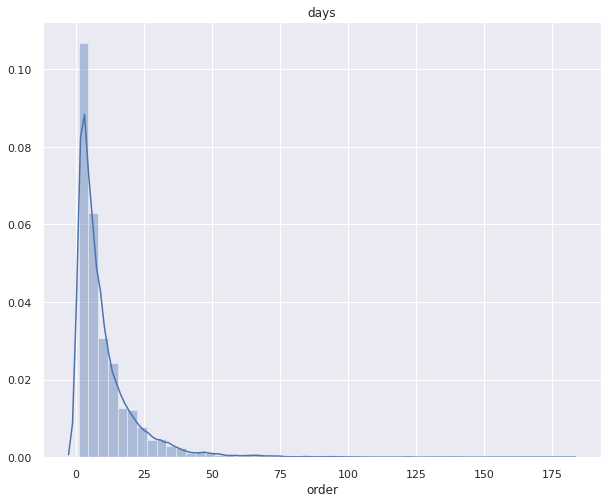

For 2_days we have 8.832113821138211 data points on average


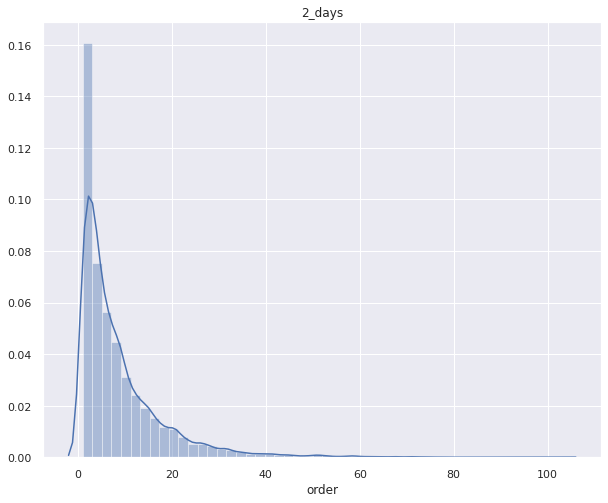

In [50]:
for day in ["days", "2_days"]:
    temp = df.groupby(["itemID", "week_backwards", day])["order"].sum()
    # How much data do we have per item
    # for most data we have too little :/
    sns.distplot(temp.groupby("itemID").size())
    print(f"For {day} we have", temp.groupby("itemID").size().mean(),
          "data points on average")
    plt.title(day)
    plt.show()

# Stop

I'm going to stop here - I think we have too little data per item for running a smoothing model per item.

It might be usefull to have a general model per category though, and normalize the values by it's total count.